Sequence Visualization

In [9]:
%load_ext autoreload
%autoreload 2
from training.datasets.classifier_dataset import DeepFakeClassifierDataset
import utils as U
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
dataset = DeepFakeClassifierDataset(crops_dir='crops', data_path='data/train_data', hardcore=True, normalize=None, folds_csv='data/train_data/fold0.csv', fold = 1, transforms=U.create_train_transforms(300))
dataset.reset(2,1)

real 12818 fakes 12818 mode train


In [19]:
sampler = None
loader = DataLoader(dataset, batch_size=4, num_workers=1, shuffle=sampler is None, sampler=sampler, pin_memory=False, drop_last=True)

eykkthrnoy 0.010.01 data/train_data/diffs/eykkthrnoy/110_0_diff.png None
gzbagbdubm  data/train_data/diffs/gzbagbdubm/290_0_diff.png None
hmxihwteht 0.01 data/train_data/diffs/hmxihwteht/230_0_diff.png None
tzgoroiixc 0.01 data/train_data/diffs/tzgoroiixc/180_0_diff.png None
ekvwecwltj 0.01 

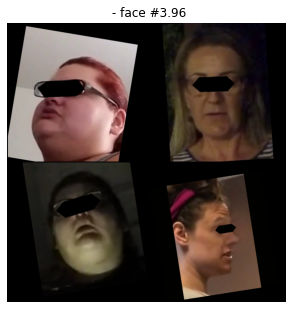

data/train_data/diffs/ekvwecwltj/110_0_diff.png None
bixvunsrsj 0.01 data/train_data/diffs/bixvunsrsj/0_0_diff.png None
knmrhhsnqw 0.01 data/train_data/diffs/knmrhhsnqw/110_0_diff.png None
('fcdndpddtw/290_0.png', tensor([0.9900], dtype=torch.float64))
('uzkbktgrom/0_0.png', tensor([0.9900], dtype=torch.float64))
('czupmkgroe/0_0.png', tensor([0.9900], dtype=torch.float64))
('vauwynfqoz/270_0.png', tensor([0.9900], dtype=torch.float64))


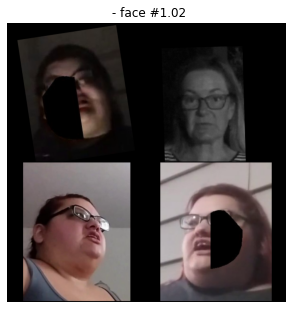

vpmyeepbep 0.01 data/train_data/diffs/vpmyeepbep/140_0_diff.png None
ijptktlyfr 0.01 data/train_data/diffs/ijptktlyfr/290_1_diff.png None
fyyyoslpgo 0.01 data/train_data/diffs/fyyyoslpgo/160_0_diff.png None
('zcwnpkzfza/90_0.png', tensor([0.9900], dtype=torch.float64))
('eykkthrnoy/110_0.png', tensor([0.0100], dtype=torch.float64))
('gzbagbdubm/290_0.png', tensor([0.0100], dtype=torch.float64))
('hmxihwteht/230_0.png', tensor([0.0100], dtype=torch.float64))


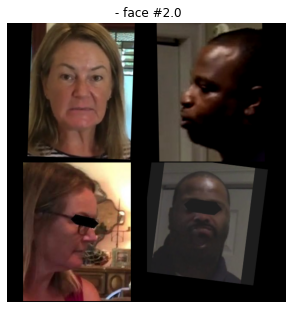

gnmmhlbzge 0.01 data/train_data/diffs/gnmmhlbzge/280_0_diff.png None
tzgoroiixc 0.01 data/train_data/diffs/tzgoroiixc/190_0_diff.png None
('tzgoroiixc/180_0.png', tensor([0.0100], dtype=torch.float64))
('ekvwecwltj/110_0.png', tensor([0.0100], dtype=torch.float64))
('mnslaqqghi/130_0.png', tensor([0.9900], dtype=torch.float64))
('tbtbhuncfm/280_0.png', tensor([0.9900], dtype=torch.float64))


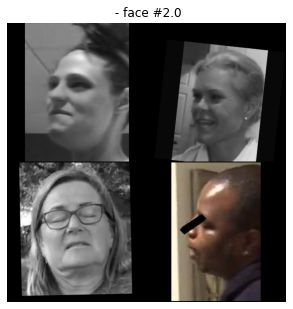

('fsiunpwpqx/40_0.png', tensor([0.9900], dtype=torch.float64))
('xgibfzgbun/60_1.png', tensor([0.9900], dtype=torch.float64))
('bixvunsrsj/0_0.png', tensor([0.0100], dtype=torch.float64))
('knmrhhsnqw/110_0.png', tensor([0.0100], dtype=torch.float64))


In [21]:
for i, (data) in enumerate(loader):
    grid = torchvision.utils.make_grid(data["image"], nrow=2)
    fig, ax = plt.subplots(1,1, figsize=(5,7))
    ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
    ax.set_title(f' - face #{data["labels"].sum()}')
    ax.axis('off')
    plt.show()
    for x in zip(data['img_name'], data["labels"]):
        print(x)
    if i > 2:
        break

In [ ]:
Images = 'data/train_data/crops/mueekicuyv/190_0.png', 'data/train_data/crops/hrztbthajc/290_0.png', 'data/train_data/crops/hkqopvybph/20_0.png', 'data/train_data/crops/xpzfhhwkwb/280_0.png'

In [43]:
import pandas as pd

In [61]:
df = pd.read_csv('data/train_data/folds.csv')
fo = df[(df.video +'/'+ df.file == 'mueekicuyv/190_0.png') | (df.video +'/'+ df.file == 'hrztbthajc/290_0.png') | (df.video +'/'+ df.file == 'hkqopvybph/20_0.png') | (df.video +'/'+ df.file == 'rmhsahyvta/180_0.png')] 

pd.to_csv('data/train_data/folds4.csv', index=False)

,video,file,label,original,frame,fold
160832,hrztbthajc,290_0.png,1,fnkdkfajak,290,0
242485,rmhsahyvta,180_0.png,0,rmhsahyvta,180,0
296924,mueekicuyv,190_0.png,0,mueekicuyv,190,0
350995,hkqopvybph,20_0.png,1,dmupfdcvca,20,0
